In [238]:
import time
import os
from selenium.webdriver.support.ui import WebDriverWait  
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [179]:
from selenium import webdriver
chromedriver = "C:\\Users\\guppr\\Documents\\DataScience\\chromedriver.exe"
driver = webdriver.Chrome(executable_path=chromedriver)
wait = WebDriverWait(driver, 10)         
driver.get('https://www.instagram.com/accounts/login/')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="4199d3359e4bed9bf9689d9a63e0fcf9")>

In [180]:
def login(user,password):
    usern=driver.find_element_by_name('username')
    usern.send_keys(user)
    passw=driver.find_element_by_name('password')
    passw.send_keys(password)
    log=driver.find_element_by_tag_name('button')
    log.submit()

In [181]:
login('username','password')

## 1 : Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
#### 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
#### 2. Now Find the number of posts these handles have done in the previous 3 days.
#### 3. Depict this information using a suitable graph.

In [182]:
def get_top(followers,count):
    
    from collections import Counter
    
    k=Counter(followers)
    highest=k.most_common(count)
    
    #returning the required no of handles with maximum followers
    return highest

In [183]:
def get_followers(open_count,top_count,accounts):

    followers={}
    
    for i in range(open_count):
        
        #opening the instagram account of the required handle
        driver.get('https://www.instagram.com/'+ accounts[i])
        
        #getting the no of followers of the handle
        no_of_followers=driver.find_elements_by_xpath('//span[@class="g47SY "]')[1].get_attribute('title')
        
        #storing the account and its followers in a dictionary as a key,value pair
        followers[accounts[i]]=no_of_followers
    
    top=get_top(followers,top_count)
    
    return top       

In [184]:
def get_handles(string):
    food_acc=[]
    food=[]
    #the search textbox
    search=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')  
    
    #typing into the search box
    search.send_keys(string)   
    time.sleep(3)
    
    #getting the handle names
    food_acc=driver.find_elements_by_class_name('Ap253')
    
    #getting only the handles and ignoring the hashtags
    for i in range(len(food_acc)):
        if food_acc[i].text[0]!='#':
            food.append(food_acc[i].text)
            
    return food

In [185]:
food_accs=get_handles('food')
food_accs

['dilsefoodie',
 '__foodiesisters__',
 'yourfoodlab',
 '__joey_doesnt_share_food_',
 'foodys',
 'bookheengineers',
 'food',
 'foodinsider',
 'food.darzee',
 'foodgod',
 'buzzfeedfood',
 'foodrush.recipe',
 'foodtalkindia',
 'delhifoodtwist',
 'foodchitra',
 'foodssoul',
 'thisisdelhi',
 'foodstoriesbypranavkalra',
 'food_maddd',
 'foodjoan',
 'foodie_hangover_girl',
 'food.dmg',
 'foody_bliss',
 'foodzzlove',
 '_food_p.o.r.n_',
 'foodgator',
 'foodiesince96',
 'my.food.epiphany',
 'foodkeliyelove',
 'food_bird17',
 'kha_bc',
 'chandafood26',
 'bhukkhad_hai_hum',
 'aesthetics.food',
 'foodstories21',
 'noidafooddiaries',
 'foodie_in_town_0',
 'foodish_fun',
 'aayushikapila',
 'foodie.in.you',
 'thatbigfoodieguy',
 'foodinsane_',
 'foodmapdelhi',
 'food.hangover_',
 'foodastic_foreverr',
 'food_treasuree',
 'foodndyou',
 'foodyypreneur',
 'food.makes.sanes',
 'foodolicious7',
 'mumbaifoodie',
 'foodgasm98',
 'food_gasm.delhi']

### Opening the top 10 handles and getting the top 5 handles with max number of followers

In [186]:
top_count=5
handles=10
top=get_followers(handles,top_count,food_accs)
top

[('foodys', '9,537,688'),
 ('food.darzee', '68,643'),
 ('__joey_doesnt_share_food_', '5,122'),
 ('__foodiesisters__', '469'),
 ('bookheengineers', '4,038')]

### function to get the no of posts of the required accounts since the given no of days

In [187]:
def get_no_of_posts(days,accounts):
    
    post_count={}
    
    for i in range(len(accounts)):
        
        #opening the instagram account of the required handle
        driver.get('https://www.instagram.com/'+ accounts[i])
        
        #getting all the posts of the current handle
        posts=driver.execute_script('return document.getElementsByClassName("v1Nh3 kIKUG  _bz0w")')
        for post in posts:
            
            #clicking every post
            post.click()
            time.sleep(5)
            
            #getting the duration of the post
            duration=driver.execute_script('return document.getElementsByClassName("_1o9PC Nzb55")[0]').text
            
            dur=duration.split(' ')
            
            #conditions to check if the post is under the required duration

            #for previous days
            if((dur[1]=="DAYS") or (dur[1]=="DAY")):
                if(int(dur[0])<=days):
                    if accounts[i] in post_count:
                        post_count[accounts[i]]+=1
                    else:
                        post_count[accounts[i]]=1
                else:
                    break
            
            #for today
            elif((dur[1]=="HOURS") or (dur[1]=="MINUTES") or (dur[1]=="SECONDS") or (dur[1]=="HOUR") or (dur[1]=="MINUTE") or (dur[1]=="SECOND")):
                if accounts[i] in post_count:
                    post_count[accounts[i]]+=1
                else:
                    post_count[accounts[i]]=1
            
            else:
                if accounts[i] in post_count:
                    post_count[accounts[i]]+=0
                else:
                    post_count[accounts[i]]=0
                
                break
            
            #clicking the cross button to exit the post and go back to the account
            l=driver.find_elements_by_class_name("wpO6b ")
            l[len(l)-1].click()
        
    return post_count

### Getting the no of posts by the yop 5 handles in the past 3 days

In [188]:
top_accounts=[]
for i in top:
    top_accounts.append(i[0])
max_days=3
no_of_posts=get_no_of_posts(max_days,top_accounts)
no_of_posts

{'foodys': 8,
 'food.darzee': 4,
 '__joey_doesnt_share_food_': 1,
 '__foodiesisters__': 2,
 'bookheengineers': 1}

### Depicting the information by a graph

In [176]:
def plot_bar(d):
    
    plt.figure(figsize=(10,8))
    plt.bar(list(d.keys()),list(d.values()))
    plt.xticks(rotation=30)
    plt.xlabel("USERNAME")
    plt.ylabel("COUNT OF POSTS IN LAST 3 DAYS")
    plt.title("NUMBER OF POSTS IN LAST 3 DAYS BY THE OBTAINED HANDELS")
    plt.show()

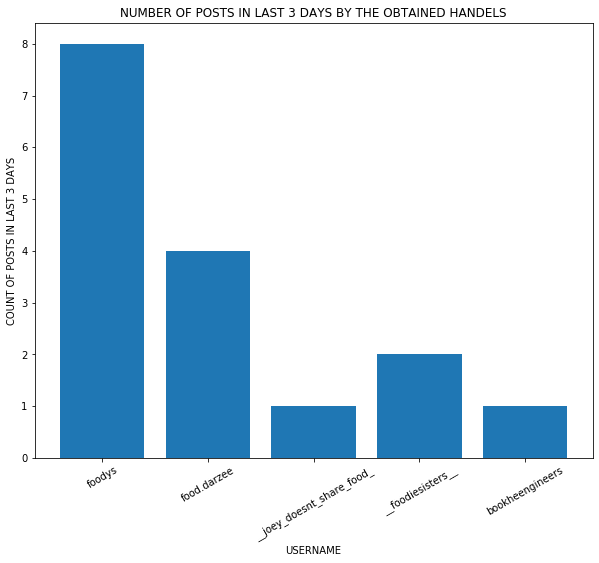

In [177]:
plot_bar(no_of_posts)

## 2 : Your friend also needs a list of hashtags that he should use in his posts.
#### 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
#### 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
#### 3. Create a csv file with two columns : the word and its frequency
#### 4.Now, find the hashtags that were most popular among these bloggers
#### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [208]:
def get_content(accounts,num):
    
    captions=[]
    
    for i in range(len(accounts)):
                
        #opening the instagram account of the required handle
        driver.get('https://www.instagram.com/'+ accounts[i])
        
        #getting all the posts of the current handle
        posts=driver.execute_script('return document.getElementsByClassName("v1Nh3 kIKUG  _bz0w")')
        posts=posts[:num]
        
        for post in posts:
            
            #clicking every post
            post.click()
            time.sleep(5)
            
            #getting the content of every post
            try:
                cont=driver.find_element_by_class_name("C4VMK").text
                cont=cont.replace("\n"," ")
                captions.append(cont)
            except NoSuchElementException:
                pass
               
            #clicking the cross button to exit the post and go back to the account
            l=driver.find_elements_by_class_name("wpO6b ")
            l[len(l)-1].click()
            
    return captions

In [195]:
top_accounts

['foodys',
 'food.darzee',
 '__joey_doesnt_share_food_',
 '__foodiesisters__',
 'bookheengineers']

### Captions for the top 5 handles

In [209]:
no_of_posts=10
captions=get_content(top_accounts,no_of_posts)
captions

['foodys Is it wrong to hit the drive through and grab Fries & a Milkshake for breakfast? 🤔🍟🍦 Well.. that’s how my day started 🙃 it was soooooooo good. What’d you guys have for breakfast? 5/5 drools 🤤🤤🤤🤤🤤 @goodeatzco 34m',
 'foodys Holy Jala’s! Triple Jalapeño Burger 🍔🌶 this gets 5/5 drools 🤤🤤🤤🤤🤤 I am actually drooling on my phone 😅 tag someone that needs to see this! @issac_eatsalot @burgerpointofficial 15h',
 'foodys Fresh Donuts from scratch 🍩🙌🤤  I gotta give this 4/5 drools 🤤🤤🤤🤤 how many would you give it? @foodyfetish 20h',
 "foodys Cookie Monster Fudge 🤯🍫 Back to back 5/5 drools! 🤤🤤🤤🤤🤤 That's never happened before! How many drools would you give this? @candyandcocoa 1d",
 "foodys Hot Chicken Goals 🔥🐔Gotta give this 5/5 drools because this is everything i'm craving right now 🤤🤤🤤🤤🤤@theirregularlens 1d",
 'foodys Ferrero Rocher Ice Cream 😍🍦I gotta give this 4/5 drools 🤤🤤🤤🤤 How many would you give it? @nonstopeats 2d',
 'foodys Deep fried Ice Cream Sandwich 🍦🍪  This is everything I n

In [219]:
def get_word_frequency(words,stop):
    
    word_freq={}
    
    #removing all the stop words
    for tok in words:
        if(tok in stop):
            words.remove(tok)
            
    #getting frequency of all the words
    for ele in words:
        if ele not in word_freq:
            word_freq[ele]=1
        else:
            word_freq[ele]+=1
            
    w=[]
    freq=[]
    for ele in word_freq:
        w.append(ele)
        freq.append(word_freq[ele])
    
    return word_freq,w,freq

### Stop words excluding '#'

In [216]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop=stopwords.words("english")
stops=set(stop)
punctuations=list(string.punctuation)
punctuations.remove('#')
stops.update(punctuations)
stops

{'!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "

### List of words from the scraped posts

In [217]:
words=[]
for cap in captions:
    l=cap.split(' ')
    for a in l:
        words.append(a)
words

['foodys',
 'Is',
 'it',
 'wrong',
 'to',
 'hit',
 'the',
 'drive',
 'through',
 'and',
 'grab',
 'Fries',
 '&',
 'a',
 'Milkshake',
 'for',
 'breakfast?',
 '🤔🍟🍦',
 'Well..',
 'that’s',
 'how',
 'my',
 'day',
 'started',
 '🙃',
 'it',
 'was',
 'soooooooo',
 'good.',
 'What’d',
 'you',
 'guys',
 'have',
 'for',
 'breakfast?',
 '5/5',
 'drools',
 '🤤🤤🤤🤤🤤',
 '@goodeatzco',
 '34m',
 'foodys',
 'Holy',
 'Jala’s!',
 'Triple',
 'Jalapeño',
 'Burger',
 '🍔🌶',
 'this',
 'gets',
 '5/5',
 'drools',
 '🤤🤤🤤🤤🤤',
 'I',
 'am',
 'actually',
 'drooling',
 'on',
 'my',
 'phone',
 '😅',
 'tag',
 'someone',
 'that',
 'needs',
 'to',
 'see',
 'this!',
 '@issac_eatsalot',
 '@burgerpointofficial',
 '15h',
 'foodys',
 'Fresh',
 'Donuts',
 'from',
 'scratch',
 '🍩🙌🤤',
 '',
 'I',
 'gotta',
 'give',
 'this',
 '4/5',
 'drools',
 '🤤🤤🤤🤤',
 'how',
 'many',
 'would',
 'you',
 'give',
 'it?',
 '@foodyfetish',
 '20h',
 'foodys',
 'Cookie',
 'Monster',
 'Fudge',
 '🤯🍫',
 'Back',
 'to',
 'back',
 '5/5',
 'drools!',
 '🤤🤤🤤🤤🤤',
 "T

### Frequency of the scraped words

In [220]:
word_freq,w,freq=get_word_frequency(words,stops)
word_freq

{'foodys': 10,
 'Is': 2,
 'wrong': 1,
 'hit': 1,
 'drive': 1,
 'grab': 1,
 'Fries': 1,
 'Milkshake': 1,
 'breakfast?': 2,
 '🤔🍟🍦': 1,
 'Well..': 1,
 'that’s': 1,
 'day': 1,
 'started': 2,
 '🙃': 1,
 'soooooooo': 1,
 'good.': 1,
 'What’d': 1,
 'guys': 4,
 '5/5': 4,
 'drools': 11,
 '🤤🤤🤤🤤🤤': 3,
 '@goodeatzco': 1,
 '34m': 1,
 'Holy': 1,
 'Jala’s!': 1,
 'Triple': 1,
 'Jalapeño': 1,
 'Burger': 2,
 '🍔🌶': 1,
 'gets': 1,
 'I': 12,
 'actually': 1,
 'drooling': 9,
 'phone': 1,
 '😅': 1,
 'tag': 1,
 'someone': 1,
 'needs': 1,
 'see': 1,
 'this!': 1,
 '@issac_eatsalot': 1,
 '@burgerpointofficial': 2,
 '15h': 1,
 'Fresh': 2,
 'Donuts': 1,
 'scratch': 1,
 '🍩🙌🤤': 1,
 '': 19,
 'gotta': 4,
 'give': 12,
 '4/5': 6,
 '🤤🤤🤤🤤': 4,
 'many': 5,
 'would': 5,
 'it?': 3,
 '@foodyfetish': 2,
 '20h': 1,
 'Cookie': 1,
 'Monster': 1,
 'Fudge': 1,
 '🤯🍫': 1,
 'Back': 1,
 'back': 1,
 'drools!': 1,
 "That's": 1,
 'never': 2,
 'happened': 1,
 'before!': 1,
 'How': 3,
 'this?': 2,
 '@candyandcocoa': 1,
 '1d': 6,
 'Hot': 1,
 'C

### Writing in the csv file

In [221]:
def write_in_csv(words,freq):
    d={'Word':words,'Frequency':freq}
    df=pd.DataFrame(d)
    df.to_csv('word_freq.csv')

In [223]:
write_in_csv(w,freq)

### Getting the popular hashtags and their frequency

In [232]:
def find_popular_hashtags(word_freq):
    
    hash_freq={}
    
    for ele in word_freq:
        if(ele[1:].isalpha()):
            if(ele[0]=="#"):
                hash_freq[ele]=word_freq[ele]
            
    return hash_freq

In [233]:
hashtag_freq=find_popular_hashtags(word_freq)
hashtag_freq

{'#transformationtuesday': 1,
 '#fooddarzee': 8,
 '#weightlossjourney': 1,
 '#weightloss': 1,
 '#healthylifestyle': 4,
 '#healthyeating': 3,
 '#healthydiet': 1,
 '#ketomeals': 1,
 '#lowcarb': 1,
 '#weightlosstransformation': 1,
 '#weightlosstips': 1,
 '#loseweightnow': 1,
 '#eathealthy': 2,
 '#instagood': 19,
 '#motivating': 1,
 '#weightlossmotivation': 1,
 '#healthyfood': 15,
 '#coronamemes': 1,
 '#lockdown': 2,
 '#covid': 2,
 '#lockdownmemes': 1,
 '#homecooking': 2,
 '#quarantinelife': 2,
 '#quarantineandchill': 1,
 '#memesdaily': 2,
 '#memeoftheday': 1,
 '#foodstagram': 21,
 '#instafood': 16,
 '#yummy': 9,
 '#wishlist': 1,
 '#qurentinedays': 2,
 '#homequarantine': 2,
 '#qurantinedays': 2,
 '#quarantime': 2,
 '#corantine': 2,
 '#quarantinetimes': 2,
 '#social': 2,
 '#bakeddarzee': 4,
 '#ketocookies': 3,
 '#ketobrownies': 2,
 '#breads': 1,
 '#cakes': 1,
 '#healthydesserts': 2,
 '#healthybakery': 1,
 '#healthybread': 1,
 '#glutenfree': 3,
 '#sugarfree': 2,
 '#sugarfreedessert': 2,
 '#d

### Plotting the top 5 most used hashtags

In [243]:
def plot_pie(n,hash_freq):
    
    from collections import Counter
    top_dict=dict(Counter(hash_freq).most_common(n))
    hashtag=[]
    freq=[]
    for key in top_dict:
        hashtag.append(key)
        freq.append(top_dict[key])
    plt.pie(freq,labels=hashtag,autopct="%2f%%") 
    plt.axis("equal")
    plt.show()

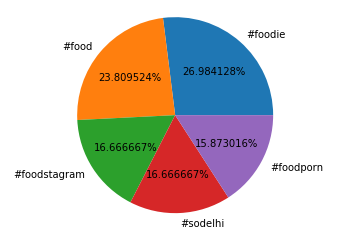

In [244]:
num=5
plot_pie(num,hashtag_freq)

## 3 : You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:
#### 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
#### 2. Calculate the average likes for a handle.
#### 3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
#### 4. Create a bar graph to depict the above obtained information.

In [259]:
def get_likes(accounts,num):
    
    top_likes={}
    
    for i in range(len(accounts)):
                
        #opening the instagram account of the required handle
        driver.get('https://www.instagram.com/'+ accounts[i])
        
        #getting all the posts of the current handle
        posts=driver.execute_script('return document.getElementsByClassName("v1Nh3 kIKUG  _bz0w")')
        posts=posts[:num]
        
        like_posts=[]
        for post in posts:
            
            #clicking every post
            post.click()
            time.sleep(5)
            
            #getting the likes of the video posts
            try:
                videos=driver.find_elements_by_tag_name("video")
                if(len(videos)>0):
                    driver.execute_script('return document.getElementsByClassName("HbPOm _9Ytll")[0]').find_element_by_tag_name("span").click()
                    likes=driver.find_element_by_class_name('vJRqr').find_element_by_tag_name("span").text
                    driver.find_element_by_class_name("QhbhU").click()
                
                #getting the likes of picture posts
                else:
                    likes=driver.find_element_by_class_name("Nm9Fw").find_element_by_tag_name("span").text
            except:
                pass
            
            likes=likes.replace(",","")
            like=int(likes)
            like_posts.append(like)
            
            #clicking the cross button to exit the post and go back to the account
            l=driver.find_elements_by_class_name("wpO6b ")
            l[len(l)-1].click()  
            
        top_likes[accounts[i]]=like_posts
            
    return top_likes

In [260]:
number=10
account_likes=get_likes(top_accounts,number)
account_likes

{'foodys': [589, 16582, 34367, 96484, 11315, 8759, 45655, 11589, 12994, 37325],
 'food.darzee': [965, 1256, 146, 311, 345, 57, 125, 167, 368, 497],
 '__joey_doesnt_share_food_': [577,
  700,
  858,
  792,
  973,
  922,
  628,
  645,
  735,
  735],
 '__foodiesisters__': [22, 26, 31, 27, 33, 44, 26, 25, 26, 31],
 'bookheengineers': [31, 413, 408, 313, 355, 391, 430, 377, 303, 414]}

In [263]:
def get_average_likes(account_likes):
    
    average_likes={}
    for acc in account_likes:
        total=0
        for num in account_likes[acc]:
            total+=num
        average=total/len(account_likes[acc])
        
        average_likes[acc]=average
    
    return average_likes
            

In [265]:
average_likes=get_average_likes(account_likes)
average_likes

{'foodys': 27565.9,
 'food.darzee': 423.7,
 '__joey_doesnt_share_food_': 756.5,
 '__foodiesisters__': 29.1,
 'bookheengineers': 343.5}

In [266]:
top

[('foodys', '9,537,688'),
 ('food.darzee', '68,643'),
 ('__joey_doesnt_share_food_', '5,122'),
 ('__foodiesisters__', '469'),
 ('bookheengineers', '4,038')]

In [285]:
def get_ratio(followers,avg):
    
    ratio={}
    
    for acc in avg:
        for han in followers:
            if(han[0]==acc):
                val=han[1].replace(",","")
                value=avg[acc]/int(val)
                ratio[acc]=value
    return ratio

In [286]:
ratio=get_ratio(top,average_likes)
ratio

{'foodys': 0.0028902077736239645,
 'food.darzee': 0.0061725157699983975,
 '__joey_doesnt_share_food_': 0.1476962124170246,
 '__foodiesisters__': 0.06204690831556504,
 'bookheengineers': 0.08506686478454681}

In [287]:
def plot_bar_graph(d):
    
    plt.figure(figsize=(10,8))
    plt.bar(list(d.keys()),list(d.values()))
    plt.xticks(rotation=30)
    plt.xlabel("USERNAME")
    plt.ylabel("RATIO")
    plt.title("FOLLOWERS TO LIKE RATIO OF EACH HANDLE")
    plt.show()

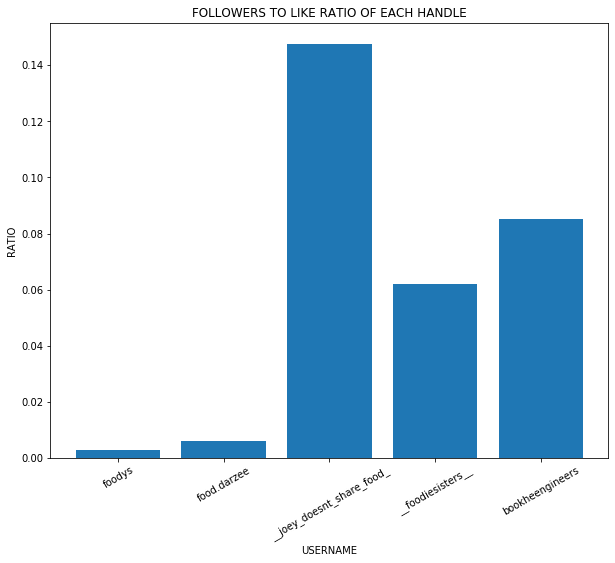

In [288]:
plot_bar_graph(ratio)